# Flight Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import calendar
sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
df = pd.read_excel('flight_dataset.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Looking if there is null values and removing it

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering Process

#### Dropping the date column and converting it inito respective day, month and year column

In [11]:
df['day'] = df['Date_of_Journey'].str.split('/').str[0]
df['month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

In [12]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [13]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [14]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019


#### Converting the arrival time column into respective hour and minute column

In [15]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [16]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[0]

df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)

#### Converting the arrival tie column into respective hour and minute column

In [17]:
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_min'] = df['Dep_Time'].str.split(':').str[0]

df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_min'] = df['Dept_min'].astype(int)

In [18]:
df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [19]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,1,22,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,13,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,4,9,9


#### Dealing with the routes and total stops

In [20]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [22]:
df.drop('Route', axis = 1, inplace=True)

##### As we have one outliers in the dataset as the duration from Mumbai to Hyderabad is only 5 minutes.

In [23]:
df.drop(6474, axis=0, inplace=True)

#### Converting the duration into minutes as the column is given as object as hour and minutes

In [24]:
hour_arr = df['Duration'].str.split(' ').str[0]
minutes_arr = df['Duration'].str.split(' ').str[1]

hour = hour_arr.str.split('h').str[0]
minutes = minutes_arr.str.split('m').str[0]
minutes.fillna(0, inplace=True)

hour = hour.astype(int)
minutes = minutes.astype(int)

df['Duration'] = hour*60 + minutes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Duration         10681 non-null  int64 
 4   Total_Stops      10681 non-null  int64 
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   day              10681 non-null  int64 
 8   month            10681 non-null  int64 
 9   year             10681 non-null  int64 
 10  Arrival_hour     10681 non-null  int64 
 11  Arrival_min      10681 non-null  int64 
 12  Dept_hour        10681 non-null  int64 
 13  Dept_min         10681 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.2+ MB


#### Dealing with additional info

In [26]:
print(df['Additional_Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


###### As we see there is two "No info" as 'No info' & 'No Info' so making them same

In [27]:
df['Additional_Info'] = df['Additional_Info'].replace({'No Info': 'No info'})

In [28]:
print(df['Additional_Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']


In [29]:
df['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

##### Now encoding the additional info i.e. categorial values into numerical values

In [30]:
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

In [31]:
df['Additional_Info'].value_counts()

7    8346
5    1982
6     320
0      19
4       7
3       4
1       1
8       1
2       1
Name: Additional_Info, dtype: int64

##### Here the values are encoded as :
- 0 --> 1 Long layover
- 1 --> 1 Short layover
- 2 --> 2 Long layover
- 3 --> Business class
- 4 --> Change airports
- 5 --> In-flight meal not included
- 6 --> No check-in baggage included
- 7 --> No info
- 8 --> Red-eye flight

#### Now dealing with Airline

In [32]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

###### Encoding this categorial value into numerical value

In [33]:
df['Airline'] = le.fit_transform(df['Airline'])

In [34]:
df['Airline'].value_counts()

4     3849
3     2053
1     1750
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

###### Here Airline are encoded as:
- 0 --> Air Asia
- 1 --> Air India
- 2 --> GoAir
- 3 --> IndiGo
- 4 --> Jet Airways
- 5 --> Jet Airways Business
- 6 --> Multiple carriers
- 7 --> Multiple carriers Premium economy
- 8 --> SpiceJet
- 9 --> Trujet
- 10 --> Vistara
- 11 --> Vistara Premium economy 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  int64 
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Duration         10681 non-null  int64 
 4   Total_Stops      10681 non-null  int64 
 5   Additional_Info  10681 non-null  int64 
 6   Price            10681 non-null  int64 
 7   day              10681 non-null  int64 
 8   month            10681 non-null  int64 
 9   year             10681 non-null  int64 
 10  Arrival_hour     10681 non-null  int64 
 11  Arrival_min      10681 non-null  int64 
 12  Dept_hour        10681 non-null  int64 
 13  Dept_min         10681 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.2+ MB


#### Dealing with source and destination

##### Source

In [36]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

###### Converting this categorial value to numerical value

In [37]:
df['Source'] = le.fit_transform(df['Source'])

#### Destination

In [38]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

###### Converting this categorial value to numerical value

In [39]:
df['Destination'] = le.fit_transform(df['Destination'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10681 non-null  int64
 1   Source           10681 non-null  int64
 2   Destination      10681 non-null  int64
 3   Duration         10681 non-null  int64
 4   Total_Stops      10681 non-null  int64
 5   Additional_Info  10681 non-null  int64
 6   Price            10681 non-null  int64
 7   day              10681 non-null  int64
 8   month            10681 non-null  int64
 9   year             10681 non-null  int64
 10  Arrival_hour     10681 non-null  int64
 11  Arrival_min      10681 non-null  int64
 12  Dept_hour        10681 non-null  int64
 13  Dept_min         10681 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


#### Looking at the price distribution

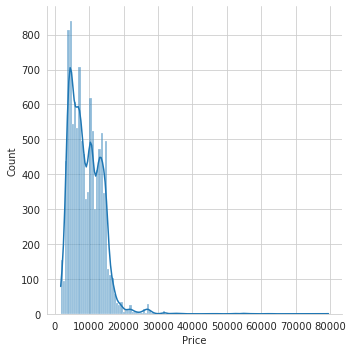

In [41]:
sns.displot(x = 'Price', data=df, kde=True)
plt.show()

##### We create a correlation between the dependent and independent feature and see at the heatmap

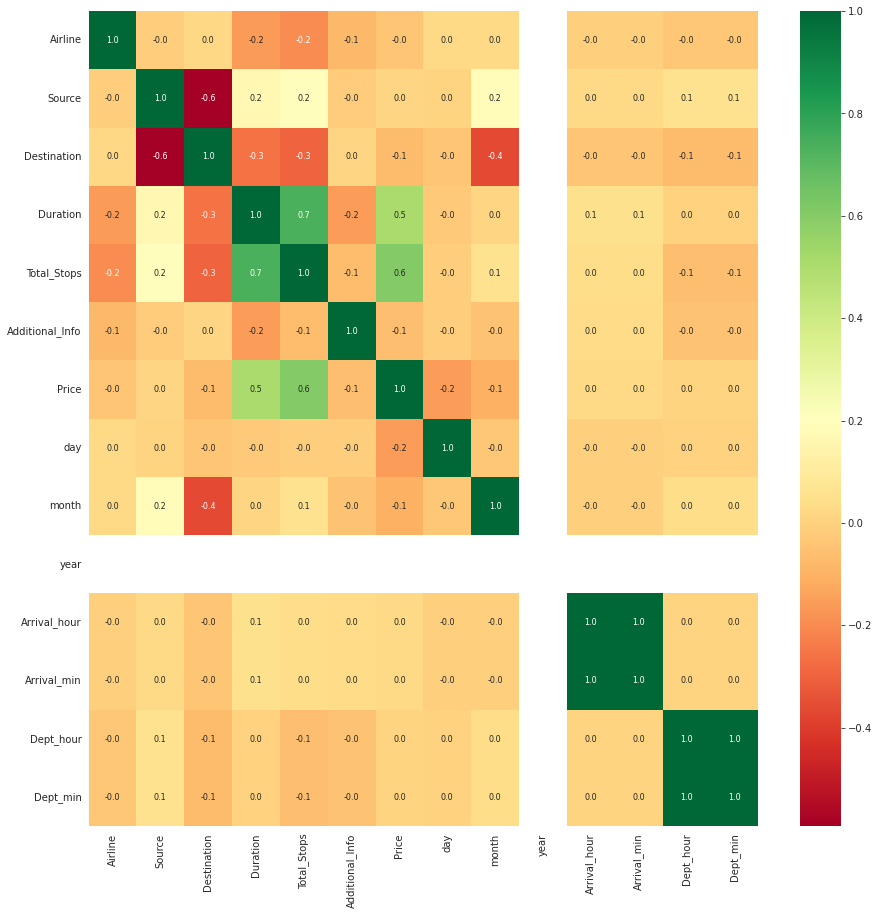

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt='.1f', annot_kws={'size': 8}, cmap='RdYlGn')
plt.show()

##### Splitting the dataset into dependent and independent feature

In [43]:
X = df.drop(['Price', 'year'], axis=1)
y = df['Price']

##### Looking at the important features from the dataset

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [45]:
selection.feature_importances_

array([0.15623399, 0.0208164 , 0.04360251, 0.15097803, 0.29446172,
       0.05875293, 0.13312883, 0.05373857, 0.02407169, 0.02454634,
       0.01989881, 0.01977017])

##### Visualizing the feature importance

<AxesSubplot:>

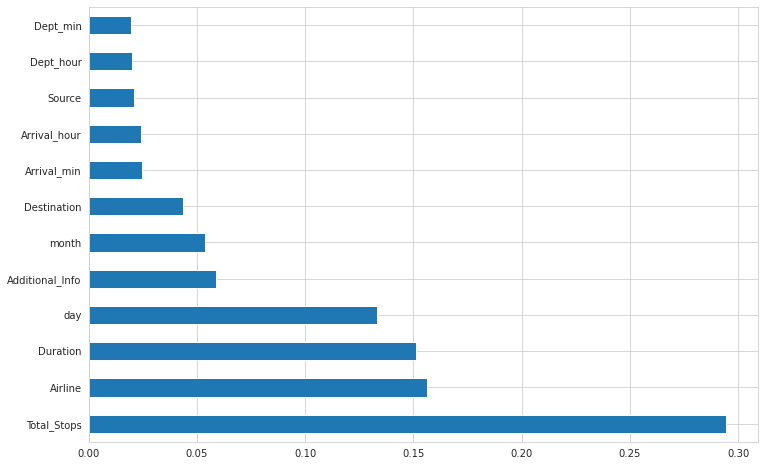

In [46]:
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')

##### Splitting the dataset into test and train set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fitting different ml model into the train set

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor

##### We make a function fit_model to fit the model and calculate accuracy score

In [50]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

#### 1. Linear Regression

In [51]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 8818.66330602 11728.02528572 10635.93070933 ...  9094.0993373
  9208.98579153 11188.58570242]

The accuracy score:  0.4456923316290854


#### 2. Decision Tree Regressor

In [52]:
fit_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 9806.  9345.  5963. ...  7480. 14676. 14871.]

The accuracy score:  0.7260533819723427


#### 3. Random Forest Regressor

In [53]:
fit_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 7540.86  8800.18  5973.13 ...  7551.14 13664.61 14259.08]

The accuracy score:  0.8460589601793069


#### 4. Extra Tree Regressor

In [54]:
fit_model(ExtraTreesRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 8222.09  8483.98  5929.58 ...  7563.38 14095.35 15214.67]

The accuracy score:  0.8935411742842879


#### 5. Support Vector Regressor

In [56]:
fit_model(SVR(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [ 6633.8995034   9675.34183    11763.71473213 ...  8641.45865781
  7542.97528459  8152.35839268]

The accuracy score:  0.31599060107893884


#### 6. XGB Regressor

In [57]:
fit_model(XGBRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 7945.4775  8884.373   7123.7563 ...  7502.3315 14144.535  15741.133 ]

The accuracy score:  0.8516228142827689


#### 7. XGBRF Regressor

In [58]:
fit_model(XGBRFRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 6650.0386 10108.101   9846.59   ...  8035.503  14143.825  11911.579 ]

The accuracy score:  0.7515430427922157
